In [1]:
import tensorflow as tf
from nasbench import api
import nasbench_keras
from nasbench_keras import ModelSpec, build_keras_model, build_module

2023-04-30 05:33:31.978451: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 05:33:32.119827: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-30 05:33:32.961883: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/amazon/efa/lib64:/opt/amazon/openmpi/lib64:/usr/local/cuda/efa/lib:/usr/local/cuda

In [2]:
dataset_path = '/home/ec2-user/nasbench_full.tfrecord'
# Use nasbench_full.tfrecord for full dataset (run download command above).
nasbench = api.NASBench(dataset_path)

Loading dataset from file... This may take a few minutes...
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Loaded dataset in 140 seconds


In [3]:
INPUT = 'input'
OUTPUT = 'output'
CONV1X1 = 'conv1x1-bn-relu'
CONV3X3 = 'conv3x3-bn-relu'
MAXPOOL3X3 = 'maxpool3x3'

In [42]:
# Create an Inception-like module (5x5 convolution replaced with two 3x3
# convolutions).
matrix = [[0, 1, 1, 1, 0, 1, 0],    # input layer
            [0, 0, 0, 0, 0, 0, 1],    # 1x1 conv
            [0, 0, 0, 0, 0, 0, 1],    # 3x3 conv
            [0, 0, 0, 0, 1, 0, 0],    # 5x5 conv (replaced by two 3x3's)
            [0, 0, 0, 0, 0, 0, 1],    # 5x5 conv (replaced by two 3x3's)
            [0, 0, 0, 0, 0, 0, 1],    # 3x3 max-pool
            [0, 0, 0, 0, 0, 0, 0]]
ops=[INPUT, CONV1X1, CONV3X3, CONV3X3, CONV3X3, MAXPOOL3X3, OUTPUT]

model_spec = api.ModelSpec(
    # Adjacency matrix of the module
    matrix=[[0, 1, 1, 1, 0, 1, 0],    # input layer
            [0, 0, 0, 0, 0, 0, 1],    # 1x1 conv
            [0, 0, 0, 0, 0, 0, 1],    # 3x3 conv
            [0, 0, 0, 0, 1, 0, 0],    # 5x5 conv (replaced by two 3x3's)
            [0, 0, 0, 0, 0, 0, 1],    # 5x5 conv (replaced by two 3x3's)
            [0, 0, 0, 0, 0, 0, 1],    # 3x3 max-pool
            [0, 0, 0, 0, 0, 0, 0]],   # output layer
    # Operations at the vertices of the module, matches order of matrix
    ops=[INPUT, CONV1X1, CONV3X3, CONV3X3, CONV3X3, MAXPOOL3X3, OUTPUT])

In [6]:
from nasbench.lib.model_builder import build_module
import numpy as np

In [9]:
build_module(model_spec, tf.ones((1,32,32,3)), 128, True)

2023-04-29 19:30:58.842601: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-29 19:30:59.051392: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-29 19:30:59.053739: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-29 19:30:59.062041: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

AttributeError: 'int' object has no attribute 'value'

In [5]:
import nasbench1
import nasbench1_spec

/opt/conda/envs/test/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
spec = nasbench1_spec._ToModelSpec(matrix, ops)
net = nasbench1.Network(spec, stem_out=128, num_stacks=3, num_mods=3, num_classes=10)

In [7]:
net

Network(
  (layers): ModuleList(
    (0): ConvBnRelu(
      (conv_bn_relu): Sequential(
        (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (1): Cell(
      (vertex_op): ModuleList(
        (0): None
        (1): Conv1x1BnRelu(
          (conv1x1): ConvBnRelu(
            (conv_bn_relu): Sequential(
              (0): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU()
            )
          )
        )
        (2): Conv3x3BnRelu(
          (conv3x3): ConvBnRelu(
            (conv_bn_relu): Sequential(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_s

In [25]:
# Create module
with tf.compat.v1.keras.backend.get_session() as sess:
    inputs = tf.keras.layers.Input((3,224,224), 1)
    outputs = build_module(spec=spec, inputs=inputs, channels=128, is_training=True)
    module = tf.keras.Model(inputs=inputs, outputs=outputs)
    module.summary()

Instructions for updating:
Colocations handled automatically by placer.


2023-04-26 05:52:20.993976: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2023-04-26 05:52:21.163883: W tensorflow/c/c_api.cc:291] Operation '{name:'conv2d_12/kernel/Assign' id:274 op device:{requested: '', assigned: ''} def:{{{node conv2d_12/kernel/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](conv2d_12/kernel, conv2d_12/kernel/Initializer/stateless_random_uniform)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 3, 224, 224)]   0           []                               
                                                                                                  
 tf_op_layer_input (TensorFlowO  [(1, 3, 224, 224)]  0           ['input_1[0][0]']                
 pLayer)                                                                                          
                                                                                                  
 conv2d_12 (Conv2D)             (1, 3, 224, 32)      7168        ['tf_op_layer_input[0][0]']      
                                                                                                  
 batch_normalization_12 (BatchN  (1, 3, 224, 32)     128         ['conv2d_12[0][0]']        

In [13]:
import torch
import torchvision
import tensorflow as tf
from torch.autograd import Variable
import numpy as np
import argparse
from model_src.comp_graph.tf_comp_graph import ComputeGraph, OP2I
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

In [64]:
import imp
import model_src
imp.reload(model_src.comp_graph.tf_comp_graph)
from model_src.comp_graph.tf_comp_graph import ComputeGraph, OP2I


In [68]:
K.clear_session()
# Create module
with tf.compat.v1.keras.backend.get_session() as sess:
    inputs = tf.keras.layers.Input((3,224,224), 1)
    outputs = build_module(spec=spec, inputs=inputs, channels=128, is_training=True)
    module = tf.keras.Model(inputs=inputs, outputs=outputs)
    module.summary()
    
    graph_def = tf.compat.v1.graph_util.convert_variables_to_constants(
        sess,
        sess.graph.as_graph_def(),
        [node.op.name for node in module.outputs])
    
# Save the TensorFlow graph definition
#graph_def = sess.graph.as_graph_def()


2023-04-26 06:32:06.290847: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-26 06:32:06.291920: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-26 06:32:06.292705: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-26 06:32:06.293518: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-26 06:32:06.294286: I tensorflow/compiler/xla/stream_executo

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 3, 224, 224)]   0           []                               
                                                                                                  
 tf_op_layer_input (TensorFlowO  [(1, 3, 224, 224)]  0           ['input_1[0][0]']                
 pLayer)                                                                                          
                                                                                                  
 conv2d_4 (Conv2D)              (1, 3, 224, 32)      7168        ['tf_op_layer_input[0][0]']      
                                                                                                  
 batch_normalization_4 (BatchNo  (1, 3, 224, 32)     128         ['conv2d_4[0][0]']           

2023-04-26 06:32:07.216982: W tensorflow/c/c_api.cc:291] Operation '{name:'batch_normalization_7/beta/Assign' id:478 op device:{requested: '', assigned: ''} def:{{{node batch_normalization_7/beta/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](batch_normalization_7/beta, batch_normalization_7/beta/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [59]:
graph_def.node

[name: "input_1"
op: "Placeholder"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "shape"
  value {
    shape {
      dim {
        size: 1
      }
      dim {
        size: 3
      }
      dim {
        size: 224
      }
      dim {
        size: 224
      }
    }
  }
}
, name: "input"
op: "Identity"
input: "input_1"
attr {
  key: "T"
  value {
    type: DT_FLOAT
  }
}
, name: "conv2d/kernel"
op: "Const"
attr {
  key: "dtype"
  value {
    type: DT_FLOAT
  }
}
attr {
  key: "value"
  value {
    tensor {
      dtype: DT_FLOAT
      tensor_shape {
        dim {
          size: 1
        }
        dim {
          size: 1
        }
        dim {
          size: 224
        }
        dim {
          size: 32
        }
      }
      tensor_content: "z\271&\275\'\000\375\274\264\242T\274t1<\2740\356\315;$\357L<\'h\233\274q\250K=\300\327\006\275\314hZ<s\3139\275\332\261\001\275@\343\341\272\n\036\024\275\214S`\274\347\315E\275\214\240\021\274487\274\2233\311\274\227V+

In [158]:
import imp
import model_src
imp.reload(model_src.comp_graph.tf_comp_graph)
from model_src.comp_graph.tf_comp_graph import ComputeGraph, OP2I

/tmp/ipykernel_6559/3755199135.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [71]:
op2i = OP2I().build_from_file()
new_cg = ComputeGraph(name="test", H=224, W=224, C_in=3)

new_cg.build_from_graph_def(graph_def, op2i, None, False)

([conv2d[op_type_idx=3
  shape=[224, 32, 1, 1]
  res=(3, 3, 224, 224, 224, 32)],
  conv2d[op_type_idx=3
  shape=[32, 32, 1, 1]
  res=(3, 3, 224, 224, 32, 32)],
  conv2d[op_type_idx=3
  shape=[224, 32, 1, 1]
  res=(3, 3, 224, 224, 224, 32)],
  conv2d[op_type_idx=3
  shape=[32, 32, 3, 3]
  res=(3, 3, 224, 224, 32, 32)],
  conv2d[op_type_idx=3
  shape=[224, 32, 1, 1]
  res=(3, 3, 224, 224, 224, 32)],
  conv2d[op_type_idx=3
  shape=[32, 32, 3, 3]
  res=(3, 3, 224, 224, 32, 32)],
  conv2d[op_type_idx=3
  shape=[32, 32, 3, 3]
  res=(3, 3, 224, 224, 32, 32)],
  conv2d[op_type_idx=3
  shape=[224, 32, 1, 1]
  res=(3, 3, 224, 224, 224, 32)],
  input[op_type_idx=1
  res=[224, 224, 224, 224, 3, 3]],
  input_1[op_type_idx=1
  res=(224, 224, 224, 224, 3, 3)],
  input[op_type_idx=1
  res=(224, 224, 224, 224, 3, 3)],
  identity[op_type_idx=25
  res=(3, 3, 224, 224, 32, 32)],
  relu[op_type_idx=6
  res=(3, 3, 224, 224, 32, 32)],
  identity[op_type_idx=25
  res=(3, 3, 224, 224, 32, 32)],
  relu[op_type_

In [72]:
new_cg.gviz_visualize()

In [73]:
from model_src.comp_graph.tf_comp_graph_dataloaders import CGRegressDataLoader
from tqdm import tqdm
from model_src.comp_graph.tf_comp_graph_models import make_cg_regressor, make_embedding_model, make_embedding_regressor_model
import torch_geometric
from utils.model_utils import set_random_seed, device, add_weight_decay, get_activ_by_name


In [74]:
loader = CGRegressDataLoader(1, [(new_cg, 0)])

Building batches: 100%|##########| 1/1 [00:00<00:00, 43.60it/s]


In [75]:
from params import *

def _batch_fwd_func(_model, _batch):
        # Define how a batch is handled by the model
        regular_node_inds = _batch[DK_BATCH_CG_REGULAR_IDX]
        regular_node_shapes = _batch[DK_BATCH_CG_REGULAR_SHAPES]
        weighted_node_inds = _batch[DK_BATCH_CG_WEIGHTED_IDX]
        weighted_node_shapes = _batch[DK_BATCH_CG_WEIGHTED_SHAPES]
        weighted_node_kernels = _batch[DK_BATCH_CG_WEIGHTED_KERNELS]
        weighted_node_bias = _batch[DK_BATCH_CG_WEIGHTED_BIAS]
        edge_tsr_list = _batch[DK_BATCH_EDGE_TSR_LIST]
        batch_last_node_idx_list = _batch[DK_BATCH_LAST_NODE_IDX_LIST]
        return _model(regular_node_inds, regular_node_shapes,
                      weighted_node_inds, weighted_node_shapes, weighted_node_kernels, weighted_node_bias,
                      edge_tsr_list, batch_last_node_idx_list)

In [76]:
def gnn_constructor(in_channels, out_channels):
        nn = torch.nn.Sequential(torch.nn.Linear(in_channels, in_channels),
                                torch.nn.Linear(in_channels, out_channels),
                                )
        return torch_geometric.nn.GINConv(nn=nn)

In [94]:
model = make_embedding_regressor_model(n_unique_labels=len(OP2I().build_from_file()), out_embed_size=128,
                              shape_embed_size=8, kernel_embed_size=8, n_unique_kernels=8, n_shape_vals=6,
                              hidden_size=128, out_channels=128,
                              gnn_constructor=gnn_constructor,
                              gnn_activ=get_activ_by_name("relu"), n_gnn_layers=6,
                              dropout_prob=0.3, aggr_method="gnn",
                              regressor_activ=get_activ_by_name(None)).to(device())

In [96]:
from utils.model_utils import model_load
from constants import *

checkpoint_file = "/home/ec2-user/nas-rec-engine/saved_models/gpi_acc_predictor_CL_dropout_encoder_model_seed262_best.pt"
if os.path.isfile(checkpoint_file):
    sd = model_load(checkpoint_file)
    try:
        model.load_state_dict(sd[CHKPT_MODEL], strict=True)
    except Exception:
        # Handles the thop bug
        state_dict = []
        for n, p in sd[CHKPT_MODEL].items():
            if "total_ops" not in n and "total_params" not in n:
                state_dict.append((n, p))
        model.load_state_dict(dict(state_dict), strict=False)
    print(sd[CHKPT_BEST_EVAL_RESULT],sd[CHKPT_BEST_EVAL_ITERATION])

-1.0000483005523682 47


In [97]:
batch_vals = torch.tensor([]).to(device())
model = model.to(device())

with torch.no_grad():
    model.eval()
    for batch in tqdm(loader, desc="Dev", ascii=True):
        output = _batch_fwd_func(model, batch)
        print(output)

Dev: 100%|##########| 1/1 [00:02<00:00,  2.67s/it]

tensor([[-1.4180]], device='cuda:0')


In [101]:
import pickle
import os


In [99]:
with open('my_object.pkl', 'wb') as f:
    pickle.dump([new_cg], f)

In [100]:
with open('/home/ec2-user/nas-rec-engine/nas101graphs.pkl', 'rb') as f:
    my_object = pickle.load(f)

# Print the unpickled object
print(my_object)

[ComputeGraph[test](n_nodes: 30, n_edges: 39)]


In [147]:
# Get the size of the pickled file
file_size = os.stat('nas101graphs.pkl').st_size
print(f"The pickled file size is {file_size} bytes")

The pickled file size is 1733310 bytes


In [143]:
data = []

In [144]:
from tqdm import tqdm
import logging
import sys
logging.getLogger('tensorflow').setLevel(logging.ERROR)


In [1]:
i = 0
for hash in tqdm(nasbench.hash_iterator()):
    info = nasbench.get_metrics_from_hash(hash)
    try:
        i += 1
        matrix = info[0]['module_adjacency']
        ops = info[0]['module_operations']
        acc = info[1][108][-1]['final_test_accuracy']
        params = info[0]['trainable_parameters']
        model_spec = api.ModelSpec(matrix=matrix, ops=ops)
        K.clear_session()
        # Create module
        with tf.compat.v1.keras.backend.get_session() as sess:
            inputs = tf.keras.layers.Input((3,224,224), 1)
            outputs = build_module(spec=model_spec, inputs=inputs, channels=128, is_training=True)
            module = tf.keras.Model(inputs=inputs, outputs=outputs)
            
            graph_def = tf.compat.v1.graph_util.convert_variables_to_constants(
                sess,
                sess.graph.as_graph_def(),
                [node.op.name for node in module.outputs])
            op2i = OP2I().build_from_file()
            new_cg = ComputeGraph(name="test", H=224, W=224, C_in=3)

            new_cg.build_from_graph_def(graph_def, op2i, 5, False)
            data.append((new_cg,(acc, params)))
            print(i)
    except:
        print("failure")

    

NameError: name 'tqdm' is not defined

In [146]:
with open('nas101graphs.pkl', 'wb') as f:
    pickle.dump(data, f)

In [8]:
import torchview
from torchview import  draw_graph

In [9]:
# Show inner tensors and Functionals
model_graph = draw_graph(
    net, input_size=(1,3,32,32),
    graph_name='MLP',
    #hide_inner_tensors=False,
    #hide_module_functions=False,
)

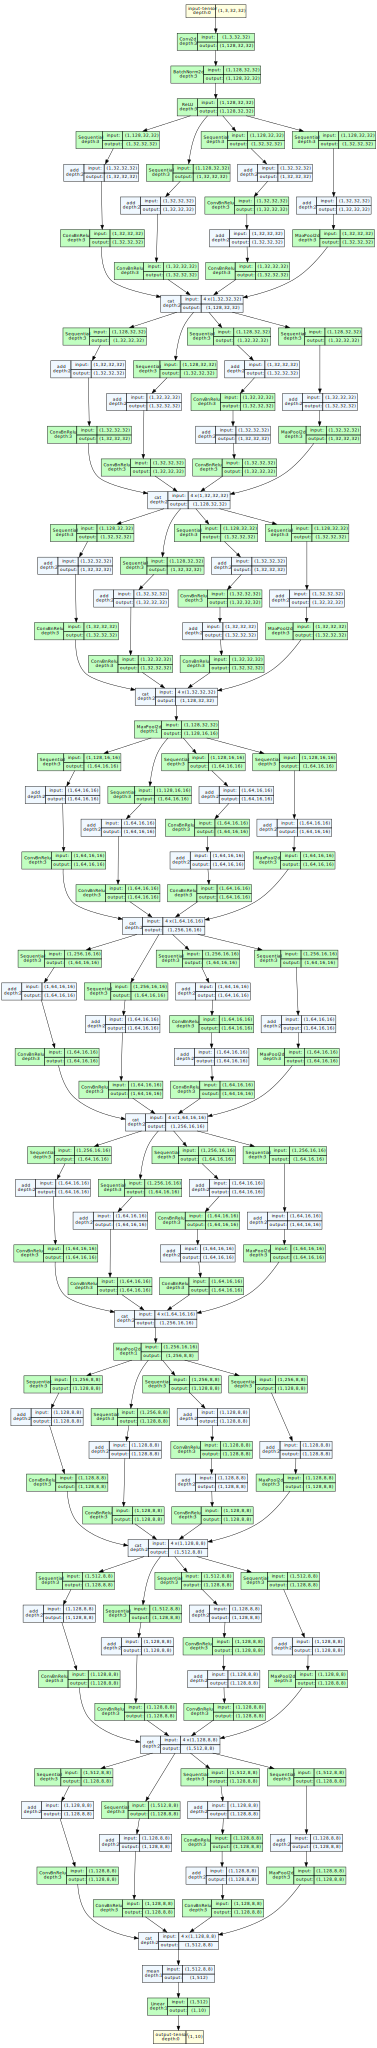

In [11]:
model_graph.visual_graph


In [12]:
graph = model_graph.visual_graph


In [156]:
edge_pairs = []
for stmt in graph.body:
    if "->" in stmt:
        #print(stmt)
        src, dst = stmt.split("->")
        #print(src, type(src))
        edge_pairs.append((int(src.strip()), int(dst.strip())))

# Remove duplicates and sort the list of nodes
edge_pairs = sorted(list(set(edge_pairs)))

# Print the list of nodes
print(edge_pairs)

[(0, 1), (1, 2), (2, 3), (3, 4), (3, 7), (3, 10), (3, 15), (4, 5), (5, 6), (6, 18), (7, 8), (8, 9), (9, 18), (10, 11), (11, 12), (12, 13), (13, 14), (14, 18), (15, 16), (16, 17), (17, 18), (18, 19), (18, 22), (18, 25), (18, 30), (19, 20), (20, 21), (21, 33), (22, 23), (23, 24), (24, 33), (25, 26), (26, 27), (27, 28), (28, 29), (29, 33), (30, 31), (31, 32), (32, 33), (33, 34), (33, 37), (33, 40), (33, 45), (34, 35), (35, 36), (36, 48), (37, 38), (38, 39), (39, 48), (40, 41), (41, 42), (42, 43), (43, 44), (44, 48), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (49, 53), (49, 56), (49, 61), (50, 51), (51, 52), (52, 64), (53, 54), (54, 55), (55, 64), (56, 57), (57, 58), (58, 59), (59, 60), (60, 64), (61, 62), (62, 63), (63, 64), (64, 65), (64, 68), (64, 71), (64, 76), (65, 66), (66, 67), (67, 79), (68, 69), (69, 70), (70, 79), (71, 72), (72, 73), (73, 74), (74, 75), (75, 79), (76, 77), (77, 78), (78, 79), (79, 80), (79, 83), (79, 86), (79, 91), (80, 81), (81, 82), (82, 94), (83, 84), (

In [65]:
model_graph.id_dict

{'139840048549264': 0,
 '139840042689392': 1,
 '139840042689296': 2,
 '139840042691216': 3,
 '139840042718688': 4,
 '139840042719984': 5,
 '139840042740080': 6,
 '139840042769664': 7,
 '139840042740656': 8,
 '139840042811552': 9,
 '139848220320816': 10,
 '139848220320768': 11,
 '139848220338064': 12,
 '139848220338640': 13,
 '139848220368128': 14,
 '139848220414208': 15,
 '139848220414160': 16,
 '139848220439648': 17,
 '139848220417904': 18,
 '139848220442096': 19,
 '139848220441376': 20,
 '139848220492224': 21,
 '139848220513616': 22,
 '139848220515680': 23,
 '139848220547248': 24,
 '139848220044352': 25,
 '139848220547200': 26,
 '139848220069792': 27,
 '139848220067776': 28,
 '139848220120400': 29,
 '139848220145936': 30,
 '139848220120304': 31,
 '139848220175472': 32,
 '139848220175424': 33,
 '139848220198464': 34,
 '139848220199760': 35,
 '139848220223952': 36,
 '139848220249440': 37,
 '139848220224528': 38,
 '139848219775232': 39,
 '139848219800720': 40,
 '139848219800672': 41,
 '

In [71]:
model_graph.node_set

{139840042689296,
 139840042689392,
 139840042691216,
 139840042718688,
 139840042719984,
 139840042740080,
 139840042740656,
 139840042769664,
 139840042811552,
 139840048549264,
 139848218229440,
 139848218229488,
 139848218250880,
 139848218300864,
 139848218300960,
 139848218326928,
 139848218327552,
 139848218348368,
 139848218382000,
 139848218382288,
 139848218403984,
 139848218404800,
 139848218497760,
 139848218519152,
 139848218520592,
 139848218548640,
 139848218548688,
 139848218570560,
 139848218616592,
 139848218616640,
 139848218619760,
 139848218646176,
 139848218647328,
 139848218669168,
 139848218672864,
 139848218694656,
 139848218724240,
 139848218725680,
 139848218741344,
 139848218741392,
 139848218762784,
 139848218816864,
 139848218816960,
 139848218838832,
 139848218839456,
 139848218864368,
 139848218898000,
 139848218898288,
 139848218920992,
 139848218922432,
 139848218946480,
 139848218947056,
 139848218971968,
 139848219029664,
 139848219029904,
 139848219

In [118]:
node = model_graph.edge_list[5][0]

In [16]:
from torchview.computation_node import TensorNode, ModuleNode, FunctionNode

if type(node) == TensorNode:
    print(node.name, node.tensor_shape, node.main_node, node.tensor_id, node.node_id, model_graph.id_dict[node.node_id])
elif type(node) == ModuleNode:
    print(node.name, node.node_id, node.input_shape, node.output_shape, node.compute_unit_id, node.is_activation, model_graph.id_dict[node.node_id], node.output_nodes)
elif type(node) == FunctionNode:
    print(node.name, node.node_id, node.input_shape, node.output_shape, node.compute_unit_id, model_graph.id_dict[node.node_id], node.output_nodes)



auxiliary-tensor (1, 3, 32, 32) input-tensor 140696388379888 140692325968816 0


In [44]:
from model_src.comp_graph.tf_comp_graph import RegularNode, WeightedNode, OP2I

In [45]:
regular_nodes, weighted_nodes = [], []
regular_nodes_idx, weighted_nodes_idx = [], []
seen_nodes = {}
MAX_H, MAX_W, MAX_C, MAX_K = 0, 0, 0, 0

for edge in model_graph.edge_list:
    input_node, output_node = edge
    for node in [input_node, output_node]:
        if type(node) == TensorNode:
            #print(node.name, node.tensor_shape, node.main_node, node.tensor_id, node.node_id, model_graph.id_dict[node.node_id])
            node_id = node.node_id
            idx_id = model_graph.id_dict[node.node_id]
            if idx_id in seen_nodes:
                continue
            str_id = f"{idx_id}|_{node.main_node.name}"
            print("found input? ", node.main_node.name.split("-")[0])
            op_type_idx = op2i[node.main_node.name.split("-")[0]]
            # [Hin, Hout, Win, Wout, Cin, Cout] for every node
            rg_node = RegularNode(str_id=str_id, label=node.main_node.name, op_type_idx=op_type_idx)
            if len(node.tensor_shape) == 4:
                rg_node.resolution = [node.tensor_shape[2], node.tensor_shape[2], node.tensor_shape[3], node.tensor_shape[3], node.tensor_shape[1], node.tensor_shape[1]]
                MAX_H = max(node.tensor_shape[2], node.tensor_shape[2], MAX_H)
                MAX_W = max(node.tensor_shape[3], node.tensor_shape[3], MAX_W)
                MAX_C = max(node.tensor_shape[1], node.tensor_shape[1], MAX_C)          
            else:
                rg_node.resolution = (0, 0, 0, 0, node.tensor_shape[1], node.tensor_shape[1])
                MAX_C = max(node.tensor_shape[1], node.tensor_shape[1], MAX_C)
            seen_nodes[idx_id] = (rg_node, len(regular_nodes))
            print(rg_node)
            regular_nodes.append(rg_node)
            
        elif type(node) == ModuleNode:
            #print(node.name, node.node_id, node.input_shape, node.output_shape, node.compute_unit_id, node.is_activation, model_graph.id_dict[node.node_id], node.output_nodes)
            if node.name in ["Sequential", "Conv2d", "ConvBnRelu", "Linear"]:
                node_id = node.node_id
                idx_id = model_graph.id_dict[node.node_id]
                if idx_id in seen_nodes:
                    continue
                str_id = f"{idx_id}|_{node.name}"
                op_type_idx = op2i[node.name]
                if "Conv" not in node.name:
                    shape = [node.input_shape[0][1], node.output_shape[0][1], 0, 0]
                else:
                    shape = [node.input_shape[0][1], node.output_shape[0][1], 1, 1]
                    MAX_K = max(1, MAX_K)
                    if node.input_shape[0][1] != node.output_shape[0][1]:
                        val = kernel_size = node.output_shape[0][1] / (node.input_shape[0][2]) - 1
                        shape = [node.input_shape[0][1], node.output_shape[0][1], val, val]
                        MAX_K = max(MAX_K, val)
                        
                # [Hin, Hout, Win, Wout, Cin, Cout] for every node
                w_node = WeightedNode(str_id=str_id, label=node.name, op_type_idx=op_type_idx, shape=shape)
                if len(node.input_shape[0]) == 4:
                    w_node.resolution = (node.input_shape[0][2], node.output_shape[0][2], node.input_shape[0][3], node.output_shape[0][3], node.input_shape[0][1], node.output_shape[0][1])
                    MAX_H = max(node.input_shape[0][2], node.output_shape[0][2], MAX_H)
                    MAX_W = max(node.input_shape[0][3], node.output_shape[0][3], MAX_W)
                    MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                else:
                    w_node.resolution = (0, 0, 0, 0, node.input_shape[0][1], node.output_shape[0][1])
                    MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                w_node.strides = 1
                seen_nodes[idx_id] = (w_node, len(weighted_nodes))
                print(w_node)
                weighted_nodes.append(w_node)
            else:
                node_id = node.node_id
                idx_id = model_graph.id_dict[node.node_id]
                if idx_id in seen_nodes:
                    continue
                str_id = f"{idx_id}|_{node.name}"
                op_type_idx = op2i[node.name]
                # [Hin, Hout, Win, Wout, Cin, Cout] for every node
                rg_node = RegularNode(str_id=str_id, label=node.name, op_type_idx=op_type_idx)
                if len(node.input_shape[0]) == 4:
                    rg_node.resolution = (node.input_shape[0][2], node.output_shape[0][2], node.input_shape[0][3], node.output_shape[0][3], node.input_shape[0][1], node.output_shape[0][1])
                    MAX_H = max(node.input_shape[0][2], node.output_shape[0][2], MAX_H)
                    MAX_W = max(node.input_shape[0][3], node.output_shape[0][3], MAX_W)
                    MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                else:
                    rg_node.resolution = (0, 0, 0, 0, node.input_shape[0][1], node.output_shape[0][1])
                    MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                seen_nodes[idx_id] = (rg_node, len(regular_nodes))
                print(rg_node)
                regular_nodes.append(rg_node)
            
        elif type(node) == FunctionNode:
            #print(node.name, node.node_id, node.input_shape, node.output_shape, node.compute_unit_id, model_graph.id_dict[node.node_id], node.output_nodes)
            node_id = node.node_id
            idx_id = model_graph.id_dict[node.node_id]
            if idx_id in seen_nodes:
                continue
            str_id = f"{idx_id}|_{node.name}"
            op_type_idx = op2i[node.name]
            # [Hin, Hout, Win, Wout, Cin, Cout] for every node
            print(node.input_shape, node.output_shape, node.name)
            rg_node = RegularNode(str_id=str_id, label=node.name, op_type_idx=op_type_idx)
            if len(node.input_shape) == 4 and len(node.output_shape) == 4:
                rg_node.resolution = (node.input_shape[0][2], node.output_shape[0][2], node.input_shape[0][3], node.output_shape[0][3], node.input_shape[0][1], node.output_shape[0][1])
                MAX_H = max(node.input_shape[0][2], node.output_shape[0][2], MAX_H)
                MAX_W = max(node.input_shape[0][3], node.output_shape[0][3], MAX_W)
                MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
            
            elif len(node.input_shape) == 4 and len(node.output_shape) == 2:
                rg_node.resolution = (node.input_shape[0][2], 0, node.input_shape[0][3], 0, node.input_shape[0][1], node.output_shape[0][1])
                MAX_H = max(node.input_shape[0][2], 0, MAX_H)
                MAX_W = max(node.input_shape[0][3], 0, MAX_W)
                MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                
            else:
                rg_node.resolution = (0, 0, 0, 0, node.input_shape[0][1], node.output_shape[0][1])
                MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                
            seen_nodes[idx_id] = (rg_node, len(regular_nodes))
            print(rg_node)
            regular_nodes.append(rg_node)
    


found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
Sequential[o

In [34]:
cg_node_ls = weighted_nodes + regular_nodes
new_edge_list = []
for edge in model_graph.edge_list:
    in_node, out_node = edge
    cg_in_node, cg_in_pos = seen_nodes[model_graph.id_dict[in_node.node_id]]
    if isinstance(cg_in_node, RegularNode):
        cg_in_pos += len(weighted_nodes) 
    cg_out_node, cg_out_pos = seen_nodes[model_graph.id_dict[out_node.node_id]]
    if isinstance(cg_out_node, RegularNode):
        cg_out_pos += len(weighted_nodes) 
    new_edge_list.append((cg_in_pos, cg_out_pos))
    
    

In [28]:
new_edge_list

[(73, 0),
 (0, 74),
 (74, 75),
 (75, 1),
 (1, 76),
 (76, 2),
 (2, 77),
 (75, 3),
 (3, 78),
 (78, 4),
 (4, 77),
 (75, 5),
 (5, 79),
 (79, 6),
 (6, 80),
 (80, 7),
 (7, 77),
 (75, 8),
 (8, 81),
 (81, 82),
 (82, 77),
 (77, 9),
 (9, 83),
 (83, 10),
 (10, 84),
 (77, 11),
 (11, 85),
 (85, 12),
 (12, 84),
 (77, 13),
 (13, 86),
 (86, 14),
 (14, 87),
 (87, 15),
 (15, 84),
 (77, 16),
 (16, 88),
 (88, 89),
 (89, 84),
 (84, 17),
 (17, 90),
 (90, 18),
 (18, 91),
 (84, 19),
 (19, 92),
 (92, 20),
 (20, 91),
 (84, 21),
 (21, 93),
 (93, 22),
 (22, 94),
 (94, 23),
 (23, 91),
 (84, 24),
 (24, 95),
 (95, 96),
 (96, 91),
 (91, 97),
 (97, 25),
 (25, 98),
 (98, 26),
 (26, 99),
 (97, 27),
 (27, 100),
 (100, 28),
 (28, 99),
 (97, 29),
 (29, 101),
 (101, 30),
 (30, 102),
 (102, 31),
 (31, 99),
 (97, 32),
 (32, 103),
 (103, 104),
 (104, 99),
 (99, 33),
 (33, 105),
 (105, 34),
 (34, 106),
 (99, 35),
 (35, 107),
 (107, 36),
 (36, 106),
 (99, 37),
 (37, 108),
 (108, 38),
 (38, 109),
 (109, 39),
 (39, 106),
 (99, 40)

In [107]:
input_size = (1, 3, 32, 32)
output_size = (1, 128, 32, 32)
stride = 1
padding = 0

kernel_size = output_size[1]/(input_size[2]) - 1
print(kernel_size)

3.0


In [37]:
def process_graph(model_graph, i):
    regular_nodes, weighted_nodes = [], []
    seen_nodes = {}
    MAX_H, MAX_W, MAX_C, MAX_K = 0, 0, 0, 0
    op2i = OP2I().build_from_file("/home/ec2-user/nas-rec-engine/data/alternative_primitives.txt")


    for edge in model_graph.edge_list:
        input_node, output_node = edge
        for node in [input_node, output_node]:
            if type(node) == TensorNode:
                #print(node.name, node.tensor_shape, node.main_node, node.tensor_id, node.node_id, model_graph.id_dict[node.node_id])
                node_id = node.node_id
                idx_id = model_graph.id_dict[node.node_id]
                if idx_id in seen_nodes:
                    continue
                str_id = f"{idx_id}|_{node.main_node.name}"
                print("found input? ", node.main_node.name.split("-")[0])
                op_type_idx = op2i[node.main_node.name.split("-")[0]]
                # [Hin, Hout, Win, Wout, Cin, Cout] for every node
                rg_node = RegularNode(str_id=str_id, label=node.main_node.name, op_type_idx=op_type_idx)
                if len(node.tensor_shape) == 4:
                    rg_node.resolution = [node.tensor_shape[2], node.tensor_shape[2], node.tensor_shape[3], node.tensor_shape[3], node.tensor_shape[1], node.tensor_shape[1]]
                    MAX_H = max(node.tensor_shape[2], node.tensor_shape[2], MAX_H)
                    MAX_W = max(node.tensor_shape[3], node.tensor_shape[3], MAX_W)
                    MAX_C = max(node.tensor_shape[1], node.tensor_shape[1], MAX_C)          
                else:
                    rg_node.resolution = (0, 0, 0, 0, node.tensor_shape[1], node.tensor_shape[1])
                    MAX_C = max(node.tensor_shape[1], node.tensor_shape[1], MAX_C)
                seen_nodes[idx_id] = (rg_node, len(regular_nodes))
                print(rg_node)
                regular_nodes.append(rg_node)
                
            elif type(node) == ModuleNode:
                #print(node.name, node.node_id, node.input_shape, node.output_shape, node.compute_unit_id, node.is_activation, model_graph.id_dict[node.node_id], node.output_nodes)
                if node.name in ["Sequential", "Conv2d", "ConvBnRelu", "Linear"]:
                    node_id = node.node_id
                    idx_id = model_graph.id_dict[node.node_id]
                    if idx_id in seen_nodes:
                        continue
                    str_id = f"{idx_id}|_{node.name}"
                    op_type_idx = op2i[node.name]
                    if "Conv" not in node.name:
                        shape = [node.input_shape[0][1], node.output_shape[0][1], 0, 0]
                    else:
                        shape = [node.input_shape[0][1], node.output_shape[0][1], 1, 1]
                        MAX_K = max(1, MAX_K)
                        if node.input_shape[0][1] != node.output_shape[0][1]:
                            val = kernel_size = node.output_shape[0][1] / (node.input_shape[0][2]) - 1
                            shape = [node.input_shape[0][1], node.output_shape[0][1], val, val]
                            MAX_K = max(MAX_K, val)
                            
                    # [Hin, Hout, Win, Wout, Cin, Cout] for every node
                    w_node = WeightedNode(str_id=str_id, label=node.name, op_type_idx=op_type_idx, shape=shape)
                    if len(node.input_shape[0]) == 4:
                        w_node.resolution = (node.input_shape[0][2], node.output_shape[0][2], node.input_shape[0][3], node.output_shape[0][3], node.input_shape[0][1], node.output_shape[0][1])
                        MAX_H = max(node.input_shape[0][2], node.output_shape[0][2], MAX_H)
                        MAX_W = max(node.input_shape[0][3], node.output_shape[0][3], MAX_W)
                        MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                    else:
                        w_node.resolution = (0, 0, 0, 0, node.input_shape[0][1], node.output_shape[0][1])
                        MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                    w_node.strides = 1
                    seen_nodes[idx_id] = (w_node, len(weighted_nodes))
                    print(w_node)
                    weighted_nodes.append(w_node)
                else:
                    node_id = node.node_id
                    idx_id = model_graph.id_dict[node.node_id]
                    if idx_id in seen_nodes:
                        continue
                    str_id = f"{idx_id}|_{node.name}"
                    op_type_idx = op2i[node.name]
                    # [Hin, Hout, Win, Wout, Cin, Cout] for every node
                    rg_node = RegularNode(str_id=str_id, label=node.name, op_type_idx=op_type_idx)
                    if len(node.input_shape[0]) == 4:
                        rg_node.resolution = (node.input_shape[0][2], node.output_shape[0][2], node.input_shape[0][3], node.output_shape[0][3], node.input_shape[0][1], node.output_shape[0][1])
                        MAX_H = max(node.input_shape[0][2], node.output_shape[0][2], MAX_H)
                        MAX_W = max(node.input_shape[0][3], node.output_shape[0][3], MAX_W)
                        MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                    else:
                        rg_node.resolution = (0, 0, 0, 0, node.input_shape[0][1], node.output_shape[0][1])
                        MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                    seen_nodes[idx_id] = (rg_node, len(regular_nodes))
                    print(rg_node)
                    regular_nodes.append(rg_node)
                
            elif type(node) == FunctionNode:
                #print(node.name, node.node_id, node.input_shape, node.output_shape, node.compute_unit_id, model_graph.id_dict[node.node_id], node.output_nodes)
                node_id = node.node_id
                idx_id = model_graph.id_dict[node.node_id]
                if idx_id in seen_nodes:
                    continue
                str_id = f"{idx_id}|_{node.name}"
                op_type_idx = op2i[node.name]
                # [Hin, Hout, Win, Wout, Cin, Cout] for every node
                print(node.input_shape, node.output_shape, node.name)
                rg_node = RegularNode(str_id=str_id, label=node.name, op_type_idx=op_type_idx)
                if len(node.input_shape) == 4 and len(node.output_shape) == 4:
                    rg_node.resolution = (node.input_shape[0][2], node.output_shape[0][2], node.input_shape[0][3], node.output_shape[0][3], node.input_shape[0][1], node.output_shape[0][1])
                    MAX_H = max(node.input_shape[0][2], node.output_shape[0][2], MAX_H)
                    MAX_W = max(node.input_shape[0][3], node.output_shape[0][3], MAX_W)
                    MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                
                elif len(node.input_shape) == 4 and len(node.output_shape) == 2:
                    rg_node.resolution = (node.input_shape[0][2], 0, node.input_shape[0][3], 0, node.input_shape[0][1], node.output_shape[0][1])
                    MAX_H = max(node.input_shape[0][2], 0, MAX_H)
                    MAX_W = max(node.input_shape[0][3], 0, MAX_W)
                    MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                    
                else:
                    rg_node.resolution = (0, 0, 0, 0, node.input_shape[0][1], node.output_shape[0][1])
                    MAX_C = max(node.input_shape[0][1], node.output_shape[0][1], MAX_C)
                    
                seen_nodes[idx_id] = (rg_node, len(regular_nodes))
                print(rg_node)
                regular_nodes.append(rg_node)
    
    cg_node_ls = weighted_nodes + regular_nodes
    new_edge_list = []
    for edge in model_graph.edge_list:
        in_node, out_node = edge
        cg_in_node, cg_in_pos = seen_nodes[model_graph.id_dict[in_node.node_id]]
        if isinstance(cg_in_node, RegularNode):
            cg_in_pos += len(weighted_nodes) 
        cg_out_node, cg_out_pos = seen_nodes[model_graph.id_dict[out_node.node_id]]
        if isinstance(cg_out_node, RegularNode):
            cg_out_pos += len(weighted_nodes) 
        new_edge_list.append((cg_in_pos, cg_out_pos))
        
    new_cg = ComputeGraph(C_in=3, H=224, W=224, name=f"test{i}", 
                      max_hidden_size=MAX_C, max_derived_H=MAX_H, 
                      max_derived_W=MAX_W, max_kernel_size=MAX_K)

    new_cg.edge_pairs = new_edge_list
    new_cg.regular_nodes = regular_nodes
    new_cg.weighted_nodes = weighted_nodes
    new_cg.n_regular_nodes = len(regular_nodes)
    new_cg.n_weighted_nodes = len(weighted_nodes)
    
    return new_cg

In [14]:
op2i = OP2I().build_from_file("/home/ec2-user/nas-rec-engine/data/alternative_primitives.txt")


In [130]:
op2i['Sequential']

28

In [23]:
import imp
import model_src
imp.reload(model_src.comp_graph.tf_comp_graph)
from model_src.comp_graph.tf_comp_graph import ComputeGraph, OP2I

/tmp/ipykernel_19966/3755199135.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [35]:
new_cg = ComputeGraph(C_in=3, H=224, W=224, name="test", 
                      max_hidden_size=MAX_C, max_derived_H=MAX_H, 
                      max_derived_W=MAX_W, max_kernel_size=MAX_K)

new_cg.edge_pairs = new_edge_list
new_cg.regular_nodes = regular_nodes
new_cg.weighted_nodes = weighted_nodes
new_cg.n_regular_nodes = len(regular_nodes)
new_cg.n_weighted_nodes = len(weighted_nodes)

In [36]:
from graphviz import Digraph

node_attr = dict(style='filled',
                    shape='box',
                    align='left',
                    fontsize='12',
                    ranksep='0.1',
                    height='0.2')
dot = Digraph(node_attr=node_attr, filename="/home/ec2-user/nas-rec-engine/Digraph.gv", graph_attr=dict(size="12,12"))
for n in new_cg.nodes:
    if isinstance(n, WeightedNode):
        dot.node(n.str_id, str(n), fillcolor='lightblue')
    elif isinstance(n, RegularNode):
        dot.node(n.str_id, str(n))
    else:
        raise ValueError("Unknown node type: {}, {}".format(n, type(n)))
for src_i, dst_i in new_cg.edge_pairs:
    dot.edge(new_cg.nodes[src_i].str_id, new_cg.nodes[dst_i].str_id)
size_per_element=0.5
min_size=12
# Get the approximate number of nodes and edges
num_rows = len(dot.body)
content_size = num_rows * size_per_element
size = max(min_size, content_size)
size_str = str(size) + "," + str(size)
dot.graph_attr.update(size=size_str)
dot.render(view=True, directory=None, format="png", cleanup=True)

'/home/ec2-user/nas-rec-engine/Digraph.gv.png'

In [39]:
from tqdm import tqdm

In [46]:
i = 0
data = []
for hash in tqdm(nasbench.hash_iterator()):
    info = nasbench.get_metrics_from_hash(hash)
    matrix = info[0]['module_adjacency']
    ops = info[0]['module_operations']
    acc = info[1][108][-1]['final_test_accuracy']
    params = info[0]['trainable_parameters']
    model_spec = api.ModelSpec(matrix=matrix, ops=ops)
    
    # create pytorch network
    spec = nasbench1_spec._ToModelSpec(matrix, ops)
    net = nasbench1.Network(spec, stem_out=128, num_stacks=3, num_mods=3, num_classes=10)
    
    # create dot graph
    model_graph = draw_graph(
        net, input_size=(1,3,32,32),
        graph_name=f'MLP{i}'
    )
    
    i += 1
    
    new_cg = process_graph(model_graph)
    print("finished ", i, new_cg)
    data.append(new_cg)
    
    
    

  0%|          | 1/423624 [00:00<34:23:59,  3.42it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
Sequential[o

  0%|          | 2/423624 [00:00<30:55:19,  3.81it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 3

  0%|          | 4/423624 [00:02<72:09:50,  1.63it/s] 

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32

  0%|          | 5/423624 [00:02<52:54:51,  2.22it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32

  0%|          | 6/423624 [00:02<47:22:47,  2.48it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32), (1, 128, 32, 32)] [(1, 128, 32, 32)] a

  0%|          | 7/423624 [00:03<39:47:00,  2.96it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32), (1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32,

  0%|          | 9/423624 [00:03<35:22:46,  3.33it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32), (1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0,

  0%|          | 11/423624 [00:03<28:06:29,  4.19it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 3

  0%|          | 12/423624 [00:04<28:27:06,  4.14it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32

  0%|          | 13/423624 [00:04<29:18:25,  4.02it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32

  0%|          | 15/423624 [00:05<34:07:51,  3.45it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32), (1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[

  0%|          | 17/423624 [00:05<28:09:03,  4.18it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
Sequential[op_type_idx=28
shape=[128,

  0%|          | 19/423624 [00:06<32:01:52,  3.67it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32), (1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0,

  0%|          | 20/423624 [00:06<38:07:35,  3.09it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32), (1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 1

  0%|          | 22/423624 [00:07<29:31:58,  3.98it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu

  0%|          | 23/423624 [00:07<31:59:03,  3.68it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32), (1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 1

  0%|          | 25/423624 [00:07<29:43:38,  3.96it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32,

  0%|          | 26/423624 [00:08<46:36:42,  2.52it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=

  0%|          | 28/423624 [00:09<34:02:14,  3.46it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32,

  0%|          | 30/423624 [00:09<27:45:27,  4.24it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 43, 0, 0]
res=(32, 32, 32, 32, 128, 43)]
[(1, 43, 32, 32)] [(1, 43, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 43, 43)]
ConvBnRelu[op_type_idx=27
shape=[43, 43, 1, 1]
res=(32, 32, 32, 32, 43, 43)]
[(1, 43, 32, 32)] [(1, 43, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 43, 43)]
[(1, 43, 32, 32)] [(1, 42, 32, 32)] __getitem__
__getitem__[op_type_idx=0
res=(0, 0, 0, 0, 43, 42)]
[(1, 43, 32, 32), (1, 43, 32, 32), (1, 42, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 43, 128)]
ConvBnRelu[op_type_idx=27
shape=[43, 43, 1, 1]
res=(32, 32, 32, 32, 43, 43)]
[(1, 43, 32, 32)] [(1, 42, 32, 32)] __getitem__
__getitem__[op_type_idx=0
res=(0, 0, 0, 0, 43, 42)]
[(1, 42, 32, 32)] 

  0%|          | 31/423624 [00:09<27:48:55,  4.23it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu

  0%|          | 33/423624 [00:10<28:28:38,  4.13it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32), (1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 3

  0%|          | 35/423624 [00:10<25:00:50,  4.70it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 43, 0, 0]
res=(32, 32, 32, 32, 128, 43)]
[(1, 43, 32, 32)] [(1, 43, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 43, 43)]
ConvBnRelu[op_type_idx=27
shape=[43, 43, 1, 1]
res=(32, 32, 32, 32, 43, 43)]
[(1, 43, 32, 32)] [(1, 43, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 43, 43)]
[(1, 43, 32, 32), (1, 43, 32, 32), (1, 42, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 43, 128)]
ConvBnRelu[op_type_idx=27
shape=[43, 43, 1, 1]
res=(32, 32, 32, 32, 43, 43)]
[(1, 43, 32, 32)] [(1, 42, 32, 32)] __getitem__
__getitem__[op_type_idx=0
res=(0, 0, 0, 0, 43, 42)]
Sequential[op_type_idx=28
shape=[128, 42, 0, 0]
res=(32, 32, 32, 32, 128, 42)]
[(1, 42, 32, 32)] [(1, 42, 32, 32)] add

  0%|          | 37/423624 [00:10<25:44:00,  4.57it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)

  0%|          | 39/423624 [00:11<29:05:40,  4.04it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32), (1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0,

  0%|          | 41/423624 [00:12<30:11:57,  3.90it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32

  0%|          | 43/423624 [00:12<25:13:21,  4.66it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 43, 0, 0]
res=(32, 32, 32, 32, 128, 43)]
[(1, 43, 32, 32)] [(1, 43, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 43, 43)]
ConvBnRelu[op_type_idx=27
shape=[43, 43, 1, 1]
res=(32, 32, 32, 32, 43, 43)]
[(1, 43, 32, 32)] [(1, 43, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 43, 43)]
[(1, 43, 32, 32)] [(1, 42, 32, 32)] __getitem__
__getitem__[op_type_idx=0
res=(0, 0, 0, 0, 43, 42)]
ConvBnRelu[op_type_idx=27
shape=[43, 43, 1, 1]
res=(32, 32, 32, 32, 43, 43)]
[(1, 43, 32, 32)] [(1, 43, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 43, 43)]
[(1, 43, 32, 32), (1, 43, 32, 32), (1, 42, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 43, 128)]
ConvBnRelu[op_type_idx=27
shape=[4

  0%|          | 44/423624 [00:12<28:23:35,  4.14it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 

  0%|          | 46/423624 [00:13<26:05:37,  4.51it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32,

  0%|          | 47/423624 [00:13<34:29:13,  3.41it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]


  0%|          | 48/423624 [00:14<35:20:28,  3.33it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32), (1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0,

  0%|          | 49/423624 [00:14<41:08:28,  2.86it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32), (1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 

  0%|          | 51/423624 [00:14<32:35:22,  3.61it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
ConvBnRelu[o

  0%|          | 53/423624 [00:15<27:04:59,  4.34it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]


  0%|          | 54/423624 [00:15<26:37:41,  4.42it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[

  0%|          | 56/423624 [00:17<64:43:46,  1.82it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
ConvBnRelu[op_type_idx=27
shape=[128, 128, 1, 1]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
[(1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 128, 0, 0]
res=(32, 32, 32, 32, 128, 128)]
[(1, 128, 32, 32), (1, 128, 32, 32)] [(1, 128, 32, 32)] add
add[

  0%|          | 58/423624 [00:17<40:44:53,  2.89it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op

  0%|          | 59/423624 [00:18<37:19:29,  3.15it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 43, 0, 0]
res=(32, 32, 32, 32, 128, 43)]
[(1, 43, 32, 32)] [(1, 43, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 43, 43)]
ConvBnRelu[op_type_idx=27
shape=[43, 43, 1, 1]
res=(32, 32, 32, 32, 43, 43)]
[(1, 43, 32, 32)] [(1, 43, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 43, 43)]
ConvBnRelu[op_type_idx=27
shape=[43, 43, 1, 1]
res=(32, 32, 32, 32, 43, 43)]
[(1, 43, 32, 32)] [(1, 43, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 43, 43)]
[(1, 43, 32, 32), (1, 43, 32, 32), (1, 42, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 43, 128)]
ConvBnRelu[op_type_idx=27
shape=[43, 43, 1, 1]
res=(32, 32, 32, 32, 43, 43)]
[(1, 43, 32, 32)] [(1, 42, 32, 32)] __getitem__
__getitem

  0%|          | 60/423624 [00:18<35:15:32,  3.34it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
MaxPool2d[op_type_idx=12
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32

  0%|          | 61/423624 [00:18<33:28:50,  3.51it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32), (1, 64, 32, 32)] [(1, 128, 32, 32)] cat
cat[op_type_idx=11
res=(0, 0, 0, 0, 64, 128)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0,

  0%|          | 62/423624 [00:19<36:05:08,  3.26it/s]

found input?  input
input-tensor[op_type_idx=1
res=[32, 32, 32, 32, 3, 3]]
Conv2d[op_type_idx=3
shape=[3, 128, 3.0, 3.0]
res=(32, 32, 32, 32, 3, 128)]
BatchNorm2d[op_type_idx=5
res=(32, 32, 32, 32, 128, 128)]
ReLU[op_type_idx=6
res=(32, 32, 32, 32, 128, 128)]
Sequential[op_type_idx=28
shape=[128, 64, 0, 0]
res=(32, 32, 32, 32, 128, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
[(1, 64, 32, 32)] [(1, 64, 32, 32)] add
add[op_type_idx=9
res=(0, 0, 0, 0, 64, 64)]
ConvBnRelu[op_type_idx=27
shape=[64, 64, 1, 1]
res=(32, 32, 32, 32, 64, 64)]
[(1, 64, 3

KeyboardInterrupt: 

In [47]:
data

[ComputeGraph[test](n_nodes: 153, n_edges: 179),
 ComputeGraph[test](n_nodes: 126, n_edges: 143),
 ComputeGraph[test](n_nodes: 144, n_edges: 170),
 ComputeGraph[test](n_nodes: 135, n_edges: 152),
 ComputeGraph[test](n_nodes: 135, n_edges: 161),
 ComputeGraph[test](n_nodes: 135, n_edges: 161),
 ComputeGraph[test](n_nodes: 162, n_edges: 188),
 ComputeGraph[test](n_nodes: 153, n_edges: 179),
 ComputeGraph[test](n_nodes: 126, n_edges: 143),
 ComputeGraph[test](n_nodes: 144, n_edges: 170),
 ComputeGraph[test](n_nodes: 150, n_edges: 176),
 ComputeGraph[test](n_nodes: 144, n_edges: 170),
 ComputeGraph[test](n_nodes: 144, n_edges: 170),
 ComputeGraph[test](n_nodes: 135, n_edges: 152),
 ComputeGraph[test](n_nodes: 153, n_edges: 179),
 ComputeGraph[test](n_nodes: 144, n_edges: 170),
 ComputeGraph[test](n_nodes: 153, n_edges: 179),
 ComputeGraph[test](n_nodes: 153, n_edges: 179),
 ComputeGraph[test](n_nodes: 147, n_edges: 173),
 ComputeGraph[test](n_nodes: 144, n_edges: 170),
 ComputeGraph[test](